In [26]:
import pandas as pd
import seaborn as sns
from utils import run_analysis


- under-five deaths: Number of under-five deaths per 1000 population
- Polio: Polio (Pol3) immunization coverage among 1-year-olds (%)
- Total expenditure: General government expenditure on health as a percentage of total government expenditure (%)
- Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

In [2]:
df = pd.read_csv("../dataset-folder/expectativa_de_vida.csv")
df.info()
df_red = df[["Life expectancy", "under-five deaths", "Polio", "Total expenditure", "Diphtheria"]]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       183 non-null    int64  
 1   Country                          183 non-null    object 
 2   Life expectancy                  183 non-null    float64
 3   Adult Mortality                  183 non-null    float64
 4   infant deaths                    183 non-null    float64
 5   Alcohol                          182 non-null    float64
 6   percentage expenditure           183 non-null    float64
 7   Hepatitis B                      174 non-null    float64
 8   Measles                          183 non-null    float64
 9   BMI                              181 non-null    float64
 10  under-five deaths                183 non-null    float64
 11  Polio                            183 non-null    float64
 12  Total expenditure     

In [3]:
df_red = df_red.dropna()
df_red.shape

(181, 5)

In [4]:
X = df_red.drop(columns=["Life expectancy"], axis=1).values
y = df_red["Life expectancy"].values.reshape(-1, 1)

In [5]:
u5_deaths = df_red["under-five deaths"].values.reshape(-1, 1)
polio = df_red["Polio"].values.reshape(-1, 1)
total_exp = df_red["Total expenditure"].values.reshape(-1, 1)
diphtheria = df_red["Diphtheria"].values.reshape(-1, 1)

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df_red.info()
df_red.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 0 to 182
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Life expectancy    181 non-null    float64
 1   under-five deaths  181 non-null    float64
 2   Polio              181 non-null    float64
 3   Total expenditure  181 non-null    float64
 4   Diphtheria         181 non-null    float64
dtypes: float64(5)
memory usage: 8.5 KB


,Life expectancy,under-five deaths,Polio,Total expenditure,Diphtheria
count,181.000000,181.000000,181.000000,181.000000,181.000000
mean,69.312983,42.129489,82.596764,5.913418,82.466999
std,9.160503,158.259059,15.556081,1.922927,16.134752
min,46.112500,0.000000,32.875000,1.646667,26.812500
25%,62.568750,0.125000,71.750000,4.681333,72.375000
50%,72.518750,3.687500,87.812500,5.945625,88.187500
75%,75.156250,29.687500,95.875000,7.052000,95.750000
max,82.537500,1812.500000,98.937500,15.863333,99.000000


<AxesSubplot:>

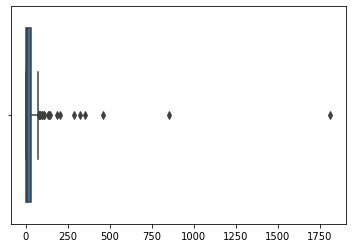

In [8]:
sns.boxplot(x = u5_deaths)

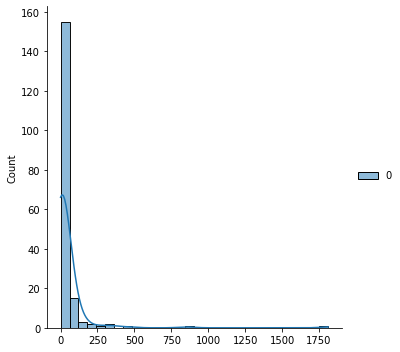

In [9]:
sns.displot(u5_deaths, bins = 30, kde = True)

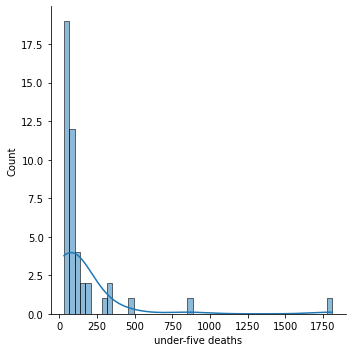

In [10]:
low_u5_deaths = df_red[df_red["under-five deaths"] > 30]
sns.displot(low_u5_deaths["under-five deaths"], kde = True)

<AxesSubplot:xlabel='under-five deaths', ylabel='Polio'>

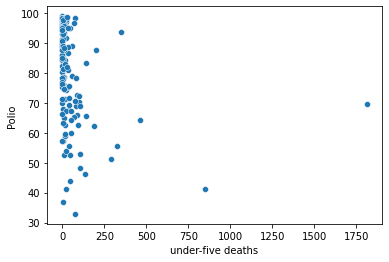

In [11]:
sns.scatterplot(data = df_red, x = "under-five deaths", y = "Polio")

<AxesSubplot:xlabel='under-five deaths', ylabel='Total expenditure'>

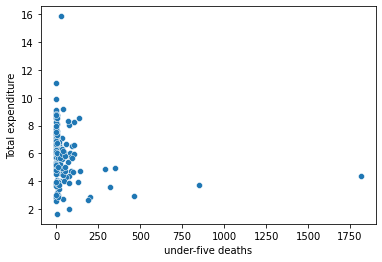

In [12]:
sns.scatterplot(data = df_red, x = "under-five deaths", y = "Total expenditure")

<AxesSubplot:xlabel='under-five deaths', ylabel='Diphtheria'>

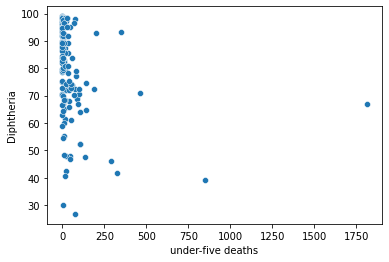

In [13]:
sns.scatterplot(data = df_red, x = "under-five deaths", y = "Diphtheria")

under-five deaths parece ser despreciable; no se ve que afecte mucho a ninguno de los otros targets.

In [14]:
df[["under-five deaths", "Diphtheria"]].corr()

,under-five deaths,Diphtheria
under-five deaths,1.000000,-0.267143
Diphtheria,-0.267143,1.000000


In [15]:
df[["under-five deaths", "Total expenditure"]].corr()

,under-five deaths,Total expenditure
under-five deaths,1.000000,-0.168813
Total expenditure,-0.168813,1.000000


In [16]:
df[["under-five deaths", "Polio"]].corr()

,under-five deaths,Polio
under-five deaths,1.000000,-0.267112
Polio,-0.267112,1.000000


Veamos cuánto afecta a la expectativa de vida

In [17]:
df[["under-five deaths", "Life expectancy"]].corr()

,under-five deaths,Life expectancy
under-five deaths,1.000000,-0.225785
Life expectancy,-0.225785,1.000000


Realmente es despreciable, lo sacamos?

Ahora veamos qué características tienen los otros targets

<AxesSubplot:>

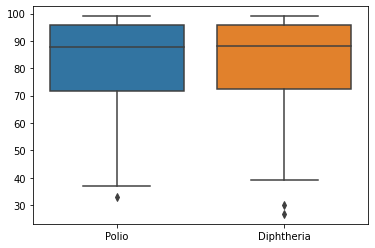

In [18]:
enfermedades = df_red[["Polio", "Diphtheria"]]
sns.boxplot(data = enfermedades)

Se ve una distribución casi idéntica para ambas enfermedades. Sigamos

<AxesSubplot:xlabel='Polio', ylabel='Diphtheria'>

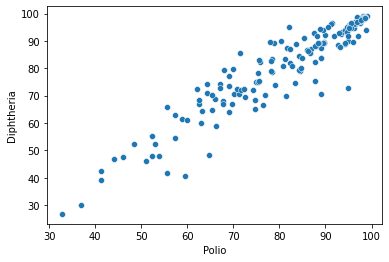

In [19]:
sns.scatterplot(data = df_red, x = "Polio", y = "Diphtheria")

In [20]:
df[["Polio", "Diphtheria"]].corr()

,Polio,Diphtheria
Polio,1.000000,0.945657
Diphtheria,0.945657,1.000000


In [21]:
df[["Polio", "Life expectancy"]].corr()

,Polio,Life expectancy
Polio,1.000000,0.679231
Life expectancy,0.679231,1.000000


In [22]:
df[["Diphtheria", "Life expectancy"]].corr()

,Diphtheria,Life expectancy
Diphtheria,1.000000,0.672322
Life expectancy,0.672322,1.000000


Elegimos Polio y descartaremos Diphtheria, ya que están altamente correlacionados pero Polio se correlaciona un poco más con Life Expectancy.
De hecho se ve que tiene una muy alta correlación.

Ahora veamos cómo se comporta el target Total expenditure

<AxesSubplot:>

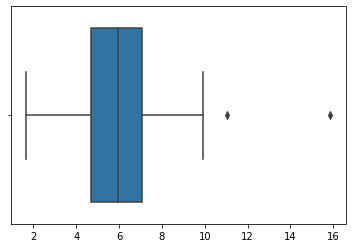

In [23]:
sns.boxplot(x = total_exp)

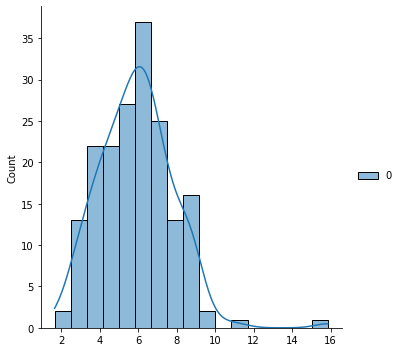

In [24]:
sns.displot(total_exp, kde = True)

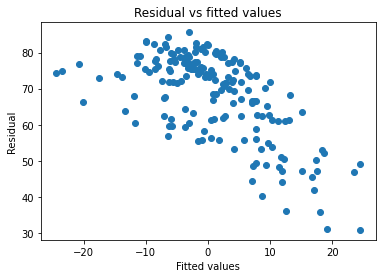

R2: [0.07588553]
R2 ajustado: [0.06022258]
RSE: [8.83063472]


In [25]:
run_analysis(df_red[["Polio", "Total expenditure", "under-five deaths"]], y)